In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Read the input data into a dataframe
carprice=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
carprice.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.info()
# No Null rows in any columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# car id is not a useful column hence dropping it
carprice.drop("car_ID",axis=1,inplace=True)

In [8]:
# Splitting CarName column by space and taking out the car company name out of it to create a new column
carprice["CarCompany"]=carprice["CarName"].str.split(" ",expand=True)[0]

In [9]:
# Dropping carname column
carprice.drop("CarName",axis=1,inplace=True)

In [10]:
carprice['CarCompany'].value_counts()
# As you can see, the spellings for certain car company names are wrong hence we need to fix them.

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
vokswagen       1
mercury         1
toyouta         1
Nissan          1
porcshce        1
Name: CarCompany, dtype: int64

In [11]:
# Making the car company name consistent
carprice['CarCompany'].replace({'vw':'volkswagen','vokswagen':'volkswagen','toyouta':'toyota','Nissan':'nissan',
                                'porcshce':'porsche','maxda':'mazda'},inplace=True)
carprice['CarCompany'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [12]:
# We can group the car companies by the region they belong to.
#carprice['CarRegion']=carprice['CarCompany'].map({'volkswagen':'Europe','toyota':'Japan','nissan':'Japan',
#                                'mazda':'Japan','honda':'Japan','mitsubishi':'Japan',
#                               'subaru':'Japan','peugeot':'Europe','volvo':'Europe','dodge':'America',
#                                'buick':'America','bmw':'Europe','plymouth':'America','audi':'Europe','saab':'Europe','porsche':'Europe',
#                                'isuzu':'Japan','alfa-romero':'Europe','jaguar':'Britain','chevrolet':'America','renault':'Europe',
#                                'mercury':'America'})

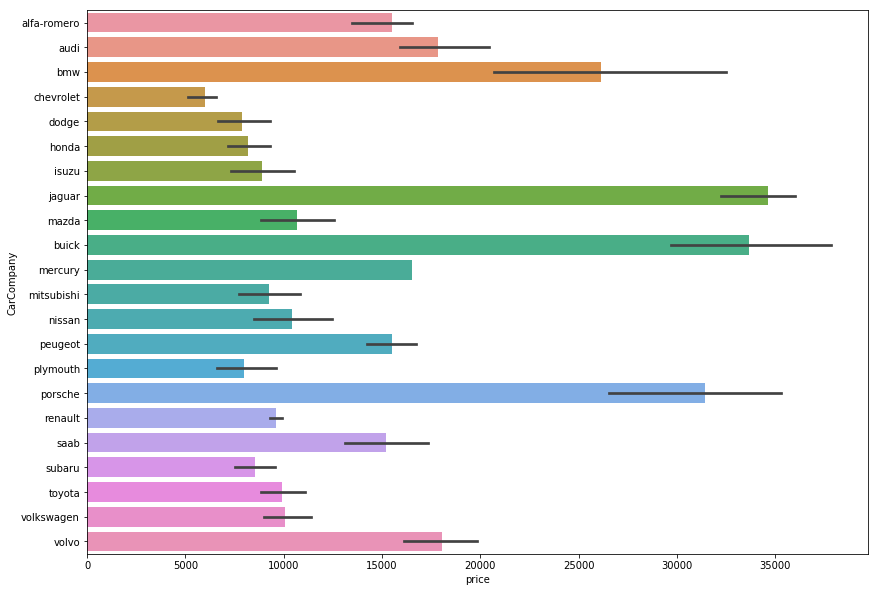

In [13]:
#Plot the chart to view most expensive car brands
plt.figure(figsize = (14, 10))
sns.barplot(x = 'price', y = 'CarCompany', data = carprice)
plt.show()
# As we can see, Buick, Jaguar & Porsche are the most expensive cars (average price per car).
# Since the barplot takes mean as the default aggregate method.

In [14]:
# Dummy variables for car company name
company = pd.get_dummies(carprice['CarCompany'],drop_first=True)

In [15]:
company.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Concat Region & carprice dataframes to form a single dataframe
carprice = pd.concat([carprice,company],axis=1)

In [17]:
#Drop the original carcompany column
carprice.drop('CarCompany',axis=1,inplace=True)

In [18]:
# List the object data type columns in order to convert them into numerical
carprice.select_dtypes(np.object).columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [19]:
for col in carprice.select_dtypes(np.object).columns:
    print(carprice[col].value_counts())

# 1. fueltype: Unordered Categorical Variable hence create 1 new variable
# 2. aspiration: Unordered Categorical Variable hence create 1 new variable
# 3. doornumber: Unordered Categorical Variable hence create 1 new variable
# 4. carbody: Unordered Categorical Variable hence create 4 new variables 
# 5. drivewheel: Ordered Categorical variable hence use label encoder
# 6. enginelocation: Unordered Categorical Variable hence create 1 new variable
# 7. enginetype: Unordered Categorical variable hence create 6 new variables 
# 8. cylindernumber: Ordered Categorical variable hence use label encoder
# 9. fuelsystem: Unordered Categorical variable hence create 7 new variables 

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [20]:
# 5. drivewheel: Ordered Categorical variable , hence use label encoding

le=LabelEncoder()
le.fit(carprice.drivewheel)
carprice.drivewheel=le.transform(carprice.drivewheel)
carprice.drivewheel.value_counts()

1    120
2     76
0      9
Name: drivewheel, dtype: int64

In [21]:
# 8. cylindernumber: Ordered Categorical variable hence use label encoding

le.fit(carprice.cylindernumber)
carprice.cylindernumber=le.transform(carprice.cylindernumber)
carprice.cylindernumber.value_counts()

2    159
3     24
1     11
0      5
6      4
5      1
4      1
Name: cylindernumber, dtype: int64

In [22]:

def createdummyvars(x):
    df = pd.get_dummies(carprice[x],drop_first=True)
    return df

# 1. fueltype: Unordered Categorical Variable hence create 1 new variable
ft=createdummyvars('fueltype')
# 2. aspiration: Unordered Categorical Variable hence create 1 new variable
asp=createdummyvars('aspiration')
# 3. doornumber: Unordered Categorical Variable hence create 1 new variable
door=createdummyvars('doornumber')
# 4. carbody: Unordered Categorical Variable hence create 4 new variables
carbody=createdummyvars('carbody')
# 6. enginelocation: Unordered Categorical Variable hence create 1 new variable
el=createdummyvars('enginelocation')
# 7. enginetype: Unordered Categorical variable hence create 6 new variables 
et=createdummyvars('enginetype')
# 9. fuelsystem: Unordered Categorical variable hence create 7 new variables 
fs=createdummyvars('fuelsystem')

In [23]:
# Concat all dataframes to form a single dataframe
carprice = pd.concat([carprice,ft,asp,door,carbody,el,et,fs],axis=1)
#Drop the original columns
carprice.drop(['fueltype','aspiration','doornumber','carbody','enginelocation','enginetype','fuelsystem'],axis=1,inplace=True)

In [24]:
# Now we can see all columns have been converted to numerical and is ready for regression analysis
carprice.dtypes

symboling             int64
drivewheel            int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber        int32
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
audi                  uint8
bmw                   uint8
buick                 uint8
chevrolet             uint8
dodge                 uint8
honda                 uint8
isuzu                 uint8
jaguar                uint8
mazda                 uint8
mercury               uint8
mitsubishi            uint8
nissan                uint8
peugeot               uint8
plymouth              uint8
porsche               uint8
renault               uint8
saab                  uint8
subaru                uint8
toyota              

In [25]:
# Following shows the correlation between Price with all other features 
carprice.corr()['price'][:].sort_values(ascending=False)

# We can see that enginesize,curbweight,horsepower,carwidth,carlength,drivewheel,wheelbase,boreratio,mpfi,buick,ohcv,porsche,
# jaguar,rear,bmw are top 15 postively correlated variables
# We can see that enginesize,curbweight,horsepower,carwidth,carlength,drivewheel,wheelbase,boreratio,mpfi,buick are the most
# postively correlated features followed by ohcv,porsche,jaguar,rear,bmw 
# 2bbl,citympg,highwaympg are the most negatively correlated features

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
mpfi                0.517075
buick               0.515094
ohcv                0.385991
porsche             0.359581
jaguar              0.326074
rear                0.324973
bmw                 0.324731
hardtop             0.225854
turbo               0.177926
dohcv               0.159225
volvo               0.143017
sedan               0.125716
carheight           0.119336
audi                0.108117
idi                 0.105679
stroke              0.079443
compressionratio    0.067984
peugeot             0.066105
saab                0.042414
l                   0.042267
mercury             0.028344
ohcf                0.016285
mfi                -0.002747
rotor              -0.004544
4bbl               -0.017306
spfi          

# Linear Regression using RFE method

In [81]:

# Split the data into test and train
train_carprice,test_carprice=train_test_split(carprice,train_size=0.7,test_size=0.3,random_state=100)


In [27]:
train_carprice.shape

(143, 59)

In [28]:
test_carprice.shape

(62, 59)

In [29]:
#scale the data for all columns except for dummy variables and label encoded columns
Scaler=MinMaxScaler()
vars=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','curbweight','enginesize','boreratio',
      'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','cylindernumber','drivewheel']
train_carprice[vars]=Scaler.fit_transform(train_carprice[vars])

C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.

In [30]:
train_carprice.describe()

,symboling,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.646853,0.411141,0.525476,0.461655,0.509004,0.407878,0.362471,0.241351,0.497946,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.283540,0.205581,0.204848,0.184517,0.215378,0.211269,0.148433,0.154619,0.207140,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.500000,0.272414,0.399187,0.304167,0.353982,0.245539,0.333333,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.500000,0.341379,0.502439,0.425000,0.522124,0.355702,0.333333,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.333333,0.301887,0.682540,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [31]:
# Split the train data into X and y. price variable forms y and remaining all variables forms X.
y_train_carprice = train_carprice.pop('price')
X_train_carprice = train_carprice

In [32]:
# Build model using RFE
lm=LinearRegression()
lm.fit(X_train_carprice,y_train_carprice)
rfe=RFE(lm,25)
rfe=rfe.fit(X_train_carprice,y_train_carprice)

In [33]:
# View the ranking of all variables
list(zip(X_train_carprice.columns,rfe.ranking_))

[('symboling', 28),
 ('drivewheel', 30),
 ('wheelbase', 11),
 ('carlength', 12),
 ('carwidth', 1),
 ('carheight', 1),
 ('curbweight', 1),
 ('cylindernumber', 1),
 ('enginesize', 1),
 ('boreratio', 1),
 ('stroke', 20),
 ('compressionratio', 1),
 ('horsepower', 5),
 ('peakrpm', 1),
 ('citympg', 18),
 ('highwaympg', 8),
 ('audi', 1),
 ('bmw', 1),
 ('buick', 21),
 ('chevrolet', 4),
 ('dodge', 1),
 ('honda', 1),
 ('isuzu', 9),
 ('jaguar', 23),
 ('mazda', 3),
 ('mercury', 32),
 ('mitsubishi', 1),
 ('nissan', 2),
 ('peugeot', 1),
 ('plymouth', 1),
 ('porsche', 6),
 ('renault', 1),
 ('saab', 13),
 ('subaru', 1),
 ('toyota', 1),
 ('volkswagen', 1),
 ('volvo', 22),
 ('gas', 1),
 ('turbo', 10),
 ('two', 31),
 ('hardtop', 15),
 ('hatchback', 14),
 ('sedan', 16),
 ('wagon', 17),
 ('rear', 1),
 ('dohcv', 25),
 ('l', 1),
 ('ohc', 19),
 ('ohcf', 1),
 ('ohcv', 27),
 ('rotor', 1),
 ('2bbl', 29),
 ('4bbl', 7),
 ('idi', 1),
 ('mfi', 33),
 ('mpfi', 26),
 ('spdi', 24),
 ('spfi', 34)]

# Linear Regression using manual method

In [34]:
# Below are the RFE selected 25 variables 
vars=X_train_carprice.columns[rfe.support_]
vars

Index(['carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'compressionratio', 'peakrpm', 'audi', 'bmw', 'dodge',
       'honda', 'mitsubishi', 'peugeot', 'plymouth', 'renault', 'subaru',
       'toyota', 'volkswagen', 'gas', 'rear', 'l', 'ohcf', 'rotor', 'idi'],
      dtype='object')

In [35]:
# Build a statmodel using the above 25 variables to view the detailed statistics. Hence only select the data only for those 25 variables
# and create a new dataframe
X_train_rfe = X_train_carprice[vars]
# Add a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Create a function called calcvif which calculates VIF. This will allow us to reuse the code 
def calcvif():
    # Drop the constant and create a new dataframe 
    X_train_vif = X_train_rfe.drop(['const'], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
# Check the Multicollinearity by calculating VIF for RFE model before creating model manually
vif=calcvif()
vif
# As it can b seen below, subrau, ohcf & rear have infinity VIF.

C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
22,ohcf,inf
20,rear,inf
16,subaru,inf
24,idi,93.72
19,gas,79.31
6,compressionratio,60.45
2,curbweight,14.90
4,enginesize,12.71
13,peugeot,10.55
21,l,10.18


In [38]:
# Remove variable ohcf with infinity VIF.
X_train_rfe=X_train_rfe.drop("ohcf",axis=1)

In [39]:
# Check the Multicollinearity by calculating VIF again before creating model manually
vif=calcvif()
vif
# As it can b seen below on dropping ohcf,subaru & rear's VIF has dipped below 3.
# However idi,gas,compressionratio,curbweight,enginesize,peugeot,l & carwidth have high VIF

,Features,VIF
23,idi,93.72
19,gas,79.31
6,compressionratio,60.45
2,curbweight,14.90
4,enginesize,12.71
13,peugeot,10.55
21,l,10.18
0,carwidth,7.08
22,rotor,5.01
3,cylindernumber,4.44


In [40]:
# Remove variable idi with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("idi",axis=1)

In [41]:
# Check the Multicollinearity by calculating VIF again before creating model manually
vif=calcvif()
vif
# curbweight,gas, carwidth, enginesize, cylindernumber,boreratio,carheight,peakrpm,peugeot & l have high VIF

,Features,VIF
2,curbweight,65.64
19,gas,55.67
0,carwidth,50.65
4,enginesize,43.22
3,cylindernumber,30.97
5,boreratio,23.77
1,carheight,17.60
7,peakrpm,14.10
13,peugeot,11.15
21,l,10.85


In [42]:
# Remove variable curbweight with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("curbweight",axis=1)
# Check the Multicollinearity by calculating VIF again
vif=calcvif()
vif
# gas, carwidth, enginesize, cylindernumber,boreratio,carheight,peakrpm,peugeot & l have high VIF

,Features,VIF
18,gas,47.52
0,carwidth,44.05
2,cylindernumber,30.66
4,boreratio,22.77
3,enginesize,22.10
6,peakrpm,13.80
1,carheight,13.28
12,peugeot,11.01
20,l,10.85
5,compressionratio,7.33


In [43]:
# Remove variable gas with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("gas",axis=1)
# Check the Multicollinearity by calculating VIF again
vif=calcvif()
vif
# carwidth, enginesize, cylindernumber,boreratio,carheight,peakrpm,peugeot & l have high VIF

,Features,VIF
0,carwidth,42.25
3,enginesize,21.35
4,boreratio,20.47
2,cylindernumber,18.22
6,peakrpm,11.60
1,carheight,11.39
12,peugeot,10.94
19,l,10.82
20,rotor,3.86
5,compressionratio,2.62


In [44]:
# Remove variable carwidth with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("carwidth",axis=1)
# Check the Multicollinearity by calculating VIF again
vif=calcvif()
vif
# enginesize, cylindernumber,boreratio,carheight,peakrpm,peugeot & l have high VIF

,Features,VIF
3,boreratio,18.43
1,cylindernumber,16.69
18,l,10.79
11,peugeot,10.76
5,peakrpm,10.72
2,enginesize,9.32
0,carheight,9.16
19,rotor,3.18
4,compressionratio,2.41
14,subaru,2.04


In [45]:
# Remove variable boreratio with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("boreratio",axis=1)
# Check the Multicollinearity by calculating VIF again
vif=calcvif()
vif
# cylindernumber,carheight,peakrpm,peugeot & l have high VIF

,Features,VIF
1,cylindernumber,16.50
17,l,10.79
10,peugeot,10.65
4,peakrpm,9.16
0,carheight,7.97
2,enginesize,4.80
18,rotor,3.03
3,compressionratio,2.36
14,toyota,1.53
8,honda,1.48


In [46]:
# Remove variable cylindernumber with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("cylindernumber",axis=1)
# Check the Multicollinearity by calculating VIF again
vif=calcvif()
vif
# carheight,peakrpm,peugeot & l have high VIF

,Features,VIF
9,peugeot,9.40
16,l,9.29
0,carheight,7.43
3,peakrpm,7.03
1,enginesize,3.51
2,compressionratio,2.29
17,rotor,1.50
7,honda,1.48
13,toyota,1.36
6,dodge,1.28


In [47]:
# Remove variable peugeot with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("peugeot",axis=1)
# Check the Multicollinearity by calculating VIF again
vif=calcvif()
vif
# carheight,peakrpm have high VIF. l's VIF has dropped to 1.37.

,Features,VIF
0,carheight,7.37
3,peakrpm,6.82
1,enginesize,3.47
2,compressionratio,2.29
16,rotor,1.49
7,honda,1.47
15,l,1.37
12,toyota,1.36
6,dodge,1.27
5,bmw,1.22


In [48]:
# Remove variable carheight with highest VIF and recheck the VIF for all other variables
X_train_rfe=X_train_rfe.drop("carheight",axis=1)
# Check the Multicollinearity by calculating VIF again
vif=calcvif()
vif
# Now all variables have VIF below 5. This is the final set of variables with which we will start creating linear model manually.

,Features,VIF
2,peakrpm,4.57
0,enginesize,3.30
1,compressionratio,1.76
6,honda,1.47
15,rotor,1.36
5,dodge,1.23
11,toyota,1.20
7,mitsubishi,1.19
14,l,1.19
12,volkswagen,1.18


In [49]:
# 1st linear model
lm1= sm.OLS(y_train_carprice,X_train_rfe).fit()

In [50]:
# View the detailed statistics for 1st linear model
lm1.summary()
# Below model shows there are few variables which are insignificant due to high pvalue.
# Volkswagen, l, subaru, plymouth & dodge have high pvalue.
# the Rsquared is 0.875 & adj Rsquared is 0.859 for this model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     55.08
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.38e-49
Time:                        11:03:30   Log-Likelihood:                 165.58
No. Observations:                 143   AIC:                            -297.2
Df Residuals:                     126   BIC:                            -246.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1313      0.033     -3.920      0.000      -0.198      -0.065
enginesize           1.1470      0.052     22.082      0.000       1.044       1.250
compressionratio     0.1061      0.036      2.967      0.004       0.035       0.177
peakrpm              0.1356      0.054      2.523      0.013       0.029       0.242
audi                 0.1012      0.039      2.602      0.010       0.024       0.178
bmw                  0.2101      0.036      5.814      0.000       0.139       0.282
dodge               -0.0433      0.037     -1.177      0.241      -0.116       0.030
honda               -0.0639      0.033     -1.954      0.053      -0.129       0.001
mitsubishi          -0.0748      0.030     -2.483      0.014      -0.134      -0.015
plymouth            -0.0439      0.044     -1.007      0.316      -0.130       0.042
renault             -0.1163      0.059     -1.984      0.049      -0.232      -0.000
subaru              -0.0195      0.029     -0.666      0.506      -0.078       0.038
toyota              -0.0389      0.023     -1.708      0.090      -0.084       0.006
volkswagen          -0.0106      0.033     -0.317      0.752      -0.077       0.056
rear                 0.2408      0.085      2.848      0.005       0.073       0.408
l                    0.0153      0.030      0.503      0.616      -0.045       0.075
rotor                0.1814      0.047      3.838      0.000       0.088       0.275
==============================================================================
Omnibus:                        6.487   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                9.682
Skew:                           0.166   Prob(JB):                      0.00790
Kurtosis:                       4.231   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Drop the highly insiginificant variable volkswagen with p value 0.75
X_train_rfe=X_train_rfe.drop("volkswagen",axis=1)

In [52]:
# 2nd Linear Model
lm2= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 2nd linear model
lm2.summary()
# Again l, subaru, plymouth & dodge have high pvalue.
# In this 2nd model, we can observe that the Adjusted R squared has remained the same whereas the F-statistic has improved.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     59.16
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.55e-50
Time:                        11:03:30   Log-Likelihood:                 165.52
No. Observations:                 143   AIC:                            -299.0
Df Residuals:                     127   BIC:                            -251.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1323      0.033     -3.986      0.000      -0.198      -0.067
enginesize           1.1495      0.051     22.467      0.000       1.048       1.251
compressionratio     0.1054      0.036      2.963      0.004       0.035       0.176
peakrpm              0.1336      0.053      2.512      0.013       0.028       0.239
audi                 0.1028      0.038      2.672      0.009       0.027       0.179
bmw                  0.2109      0.036      5.867      0.000       0.140       0.282
dodge               -0.0414      0.036     -1.144      0.255      -0.113       0.030
honda               -0.0618      0.032     -1.937      0.055      -0.125       0.001
mitsubishi          -0.0733      0.030     -2.472      0.015      -0.132      -0.015
plymouth            -0.0419      0.043     -0.976      0.331      -0.127       0.043
renault             -0.1150      0.058     -1.974      0.051      -0.230       0.000
subaru              -0.0183      0.029     -0.631      0.529      -0.076       0.039
toyota              -0.0376      0.022     -1.684      0.095      -0.082       0.007
rear                 0.2422      0.084      2.878      0.005       0.076       0.409
l                    0.0165      0.030      0.548      0.584      -0.043       0.076
rotor                0.1840      0.046      3.966      0.000       0.092       0.276
==============================================================================
Omnibus:                        6.632   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                9.889
Skew:                           0.178   Prob(JB):                      0.00712
Kurtosis:                       4.238   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Drop the highly insiginificant variable l with p value 0.58
X_train_rfe=X_train_rfe.drop("l",axis=1)

In [54]:
# 3rd Linear Model
lm3= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 3rd linear model
lm3.summary()
# Again subaru, plymouth & dodge still have high pvalue.
# In this 3rd model, we can observe that the Adjusted R squared has remained the same.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     63.71
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.22e-50
Time:                        11:03:30   Log-Likelihood:                 165.35
No. Observations:                 143   AIC:                            -300.7
Df Residuals:                     128   BIC:                            -256.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1279      0.032     -3.981      0.000      -0.192      -0.064
enginesize           1.1469      0.051     22.577      0.000       1.046       1.247
compressionratio     0.1071      0.035      3.032      0.003       0.037       0.177
peakrpm              0.1285      0.052      2.461      0.015       0.025       0.232
audi                 0.1018      0.038      2.658      0.009       0.026       0.178
bmw                  0.2090      0.036      5.857      0.000       0.138       0.280
dodge               -0.0428      0.036     -1.190      0.236      -0.114       0.028
honda               -0.0627      0.032     -1.973      0.051      -0.126       0.000
mitsubishi          -0.0749      0.029     -2.544      0.012      -0.133      -0.017
plymouth            -0.0434      0.043     -1.014      0.312      -0.128       0.041
renault             -0.1169      0.058     -2.015      0.046      -0.232      -0.002
subaru              -0.0210      0.028     -0.739      0.461      -0.077       0.035
toyota              -0.0402      0.022     -1.847      0.067      -0.083       0.003
rear                 0.2425      0.084      2.890      0.005       0.076       0.409
rotor                0.1834      0.046      3.964      0.000       0.092       0.275
==============================================================================
Omnibus:                        6.252   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                9.164
Skew:                           0.160   Prob(JB):                       0.0102
Kurtosis:                       4.198   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Drop the highly insiginificant variable subaru with p value 0.46
X_train_rfe=X_train_rfe.drop("subaru",axis=1)

In [56]:
# 4th Linear Model
lm4= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 4th linear model
lm4.summary()
# Again plymouth & dodge still have high p value.
# We can observe that the Adjusted R squared has remained the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     68.82
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.88e-51
Time:                        11:03:30   Log-Likelihood:                 165.04
No. Observations:                 143   AIC:                            -302.1
Df Residuals:                     129   BIC:                            -260.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1391      0.028     -4.915      0.000      -0.195      -0.083
enginesize           1.1555      0.049     23.409      0.000       1.058       1.253
compressionratio     0.1146      0.034      3.391      0.001       0.048       0.181
peakrpm              0.1401      0.050      2.818      0.006       0.042       0.238
audi                 0.1038      0.038      2.719      0.007       0.028       0.179
bmw                  0.2123      0.035      6.012      0.000       0.142       0.282
dodge               -0.0399      0.036     -1.118      0.266      -0.111       0.031
honda               -0.0614      0.032     -1.937      0.055      -0.124       0.001
mitsubishi          -0.0713      0.029     -2.461      0.015      -0.129      -0.014
plymouth            -0.0406      0.043     -0.954      0.342      -0.125       0.044
renault             -0.1133      0.058     -1.964      0.052      -0.227       0.001
toyota              -0.0356      0.021     -1.710      0.090      -0.077       0.006
rear                 0.2399      0.084      2.867      0.005       0.074       0.405
rotor                0.1843      0.046      3.993      0.000       0.093       0.276
==============================================================================
Omnibus:                        6.257   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                9.100
Skew:                           0.166   Prob(JB):                       0.0106
Kurtosis:                       4.190   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Drop the highly insiginificant variable plymouth with p value 0.34
X_train_rfe=X_train_rfe.drop("plymouth",axis=1)

In [58]:
# 5th Linear Model
lm5= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 5th linear model
lm5.summary()
#  dodge has highiest p value.
# We can observe that the Adjusted R squared has remained the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     74.53
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.32e-52
Time:                        11:03:30   Log-Likelihood:                 164.54
No. Observations:                 143   AIC:                            -303.1
Df Residuals:                     130   BIC:                            -264.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1397      0.028     -4.939      0.000      -0.196      -0.084
enginesize           1.1620      0.049     23.780      0.000       1.065       1.259
compressionratio     0.1140      0.034      3.373      0.001       0.047       0.181
peakrpm              0.1319      0.049      2.694      0.008       0.035       0.229
audi                 0.1071      0.038      2.821      0.006       0.032       0.182
bmw                  0.2128      0.035      6.028      0.000       0.143       0.283
dodge               -0.0355      0.035     -1.002      0.318      -0.105       0.035
honda               -0.0563      0.031     -1.802      0.074      -0.118       0.006
mitsubishi          -0.0683      0.029     -2.372      0.019      -0.125      -0.011
renault             -0.1112      0.058     -1.929      0.056      -0.225       0.003
toyota              -0.0339      0.021     -1.636      0.104      -0.075       0.007
rear                 0.2432      0.084      2.910      0.004       0.078       0.409
rotor                0.1909      0.046      4.186      0.000       0.101       0.281
==============================================================================
Omnibus:                        6.370   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                9.116
Skew:                           0.185   Prob(JB):                       0.0105
Kurtosis:                       4.180   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Drop the highly insiginificant variable dodge with p value 0.31
X_train_rfe=X_train_rfe.drop("dodge",axis=1)

In [60]:
# 6th Linear Model
lm6= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 6th linear model
lm6.summary()
#  Now Toyota & Honda have highiest p value.
# We can observe that the Adjusted R squared has remained the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     81.21
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.89e-53
Time:                        11:03:30   Log-Likelihood:                 163.99
No. Observations:                 143   AIC:                            -304.0
Df Residuals:                     131   BIC:                            -268.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1406      0.028     -4.974      0.000      -0.197      -0.085
enginesize           1.1697      0.048     24.237      0.000       1.074       1.265
compressionratio     0.1135      0.034      3.361      0.001       0.047       0.180
peakrpm              0.1228      0.048      2.553      0.012       0.028       0.218
audi                 0.1110      0.038      2.936      0.004       0.036       0.186
bmw                  0.2134      0.035      6.044      0.000       0.144       0.283
honda               -0.0505      0.031     -1.647      0.102      -0.111       0.010
mitsubishi          -0.0648      0.029     -2.268      0.025      -0.121      -0.008
renault             -0.1088      0.058     -1.889      0.061      -0.223       0.005
toyota              -0.0320      0.021     -1.549      0.124      -0.073       0.009
rear                 0.2468      0.084      2.955      0.004       0.082       0.412
rotor                0.1984      0.045      4.409      0.000       0.109       0.287
==============================================================================
Omnibus:                        6.557   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                9.304
Skew:                           0.204   Prob(JB):                      0.00954
Kurtosis:                       4.181   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Drop the highly insiginificant variable toyota with p value 0.12
X_train_rfe=X_train_rfe.drop("toyota",axis=1)

In [62]:
# 7th Linear Model
lm7= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 7th linear model
lm7.summary()
#  Honda has highiest p value.
# We can observe that the Adjusted R squared has remained the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     88.15
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.98e-53
Time:                        11:03:30   Log-Likelihood:                 162.69
No. Observations:                 143   AIC:                            -303.4
Df Residuals:                     132   BIC:                            -270.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1571      0.026     -5.961      0.000      -0.209      -0.105
enginesize           1.1770      0.048     24.379      0.000       1.082       1.273
compressionratio     0.1233      0.033      3.697      0.000       0.057       0.189
peakrpm              0.1410      0.047      3.007      0.003       0.048       0.234
audi                 0.1147      0.038      3.024      0.003       0.040       0.190
bmw                  0.2203      0.035      6.257      0.000       0.151       0.290
honda               -0.0484      0.031     -1.570      0.119      -0.109       0.013
mitsubishi          -0.0590      0.028     -2.071      0.040      -0.115      -0.003
renault             -0.1024      0.058     -1.774      0.078      -0.217       0.012
rear                 0.2450      0.084      2.919      0.004       0.079       0.411
rotor                0.1993      0.045      4.406      0.000       0.110       0.289
==============================================================================
Omnibus:                        6.606   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                9.282
Skew:                           0.212   Prob(JB):                      0.00965
Kurtosis:                       4.174   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Drop the highly insiginificant variable honda with p value 0.11
X_train_rfe=X_train_rfe.drop("honda",axis=1)

In [64]:
# 8th Linear Model
lm8= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 8th linear model
lm8.summary()
#  Now we can se Renault & Mitsubushi have high p value.
# We can observe that the Adjusted R squared has remained the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     96.61
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.54e-54
Time:                        11:03:30   Log-Likelihood:                 161.37
No. Observations:                 143   AIC:                            -302.7
Df Residuals:                     133   BIC:                            -273.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1503      0.026     -5.750      0.000      -0.202      -0.099
enginesize           1.1835      0.048     24.469      0.000       1.088       1.279
compressionratio     0.1169      0.033      3.511      0.001       0.051       0.183
peakrpm              0.1128      0.044      2.590      0.011       0.027       0.199
audi                 0.1221      0.038      3.228      0.002       0.047       0.197
bmw                  0.2200      0.035      6.216      0.000       0.150       0.290
mitsubishi          -0.0537      0.028     -1.889      0.061      -0.110       0.003
renault             -0.0993      0.058     -1.711      0.089      -0.214       0.015
rear                 0.2561      0.084      3.046      0.003       0.090       0.423
rotor                0.2145      0.044      4.829      0.000       0.127       0.302
==============================================================================
Omnibus:                        7.018   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                9.328
Skew:                           0.267   Prob(JB):                      0.00943
Kurtosis:                       4.132   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Drop the highly insiginificant variable renault with p value 0.08
X_train_rfe=X_train_rfe.drop("renault",axis=1)

In [66]:
# 9th Linear Model
lm9= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 9th linear model
lm9.summary()
#  Now only Mitsubishi has high p value.
# We can observe that the Adjusted R squared has remained the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.57e-54
Time:                        11:03:30   Log-Likelihood:                 159.82
No. Observations:                 143   AIC:                            -301.6
Df Residuals:                     134   BIC:                            -275.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1526      0.026     -5.804      0.000      -0.205      -0.101
enginesize           1.1811      0.049     24.255      0.000       1.085       1.277
compressionratio     0.1203      0.033      3.594      0.000       0.054       0.186
peakrpm              0.1140      0.044      2.600      0.010       0.027       0.201
audi                 0.1241      0.038      3.260      0.001       0.049       0.199
bmw                  0.2226      0.036      6.250      0.000       0.152       0.293
mitsubishi          -0.0517      0.029     -1.807      0.073      -0.108       0.005
rear                 0.2582      0.085      3.049      0.003       0.091       0.426
rotor                0.2155      0.045      4.816      0.000       0.127       0.304
==============================================================================
Omnibus:                        6.475   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                7.744
Skew:                           0.289   Prob(JB):                       0.0208
Kurtosis:                       3.983   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Drop the highly insiginificant variable mitsubishi with p value 0.07
X_train_rfe=X_train_rfe.drop("mitsubishi",axis=1)

In [68]:
# 10th Linear Model
lm10= sm.OLS(y_train_carprice,X_train_rfe).fit()
# View the statistics for 10th linear model
lm10.summary()
#  Now only Mitsubishi has high p value.
# We can observe that the Adjusted R squared has remained the same. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.12e-54
Time:                        11:03:31   Log-Likelihood:                 158.09
No. Observations:                 143   AIC:                            -300.2
Df Residuals:                     135   BIC:                            -276.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1567      0.026     -5.933      0.000      -0.209      -0.104
enginesize           1.1821      0.049     24.076      0.000       1.085       1.279
compressionratio     0.1271      0.034      3.792      0.000       0.061       0.193
peakrpm              0.1110      0.044      2.511      0.013       0.024       0.198
audi                 0.1292      0.038      3.374      0.001       0.053       0.205
bmw                  0.2265      0.036      6.319      0.000       0.156       0.297
rear                 0.2630      0.085      3.080      0.003       0.094       0.432
rotor                0.2208      0.045      4.906      0.000       0.132       0.310
==============================================================================
Omnibus:                        6.413   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                7.103
Skew:                           0.323   Prob(JB):                       0.0287
Kurtosis:                       3.880   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# View the value counts of all variables being finalized in the model 
print(X_train_rfe['rear'].value_counts())
print(X_train_rfe['rotor'].value_counts())
print(X_train_rfe['audi'].value_counts())
print(X_train_rfe['bmw'].value_counts())
print(X_train_rfe['peakrpm'].value_counts())
print(X_train_rfe['compressionratio'].value_counts())
print(X_train_rfe['enginesize'].value_counts())

0    142
1      1
Name: rear, dtype: int64
0    139
1      4
Name: rotor, dtype: int64
0    138
1      5
Name: audi, dtype: int64
0    137
1      6
Name: bmw, dtype: int64
0.551020    28
0.265306    24
0.428571    19
0.346939    15
0.510204     9
0.755102     8
0.000000     4
0.020408     4
0.244898     4
0.387755     4
0.673469     4
0.448980     4
0.081633     3
0.040816     3
0.142857     2
0.102041     2
0.204082     1
0.306122     1
0.591837     1
0.653061     1
1.000000     1
0.714286     1
Name: peakrpm, dtype: int64
0.125000    35
0.150000    21
0.093750     9
0.156250     8
0.106250     6
0.137500     6
0.162500     5
0.143750     5
0.000000     4
0.037500     4
0.875000     4
0.906250     3
0.081250     3
0.031250     3
0.100000     3
0.062500     3
0.087500     3
0.112500     2
1.000000     2
0.043750     2
0.068750     2
0.187500     1
0.281250     1
0.968750     1
0.931250     1
0.937500     1
0.981250     1
0.131250     1
0.050000     1
0.150625     1
0.144375     1
Name:

In [70]:
# We can see above from the value counts, that the number of records for rear is 1, rotor is 4, audi is 5 and bmw is 6 when 
# compared to the records with value zero. Even though the number of record is less, the variable is found to be significant.
# We just have to ensure we dont have any category which is present only in Test and not in Train, any such categories 
# must be removed from the Train and model has to be recreated.
# Since all the variables are significant, we can finalize that lm10 is the final model

# Residual Analysis of the train data

In [71]:
y_train_pred=lm10.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

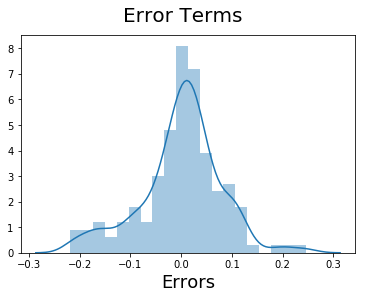

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_pred - y_train_carprice), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)       

# Error terms are normally distributed around mean value of 0 as expected.

# Running the model on test data

In [73]:
# scale the Test data 
vars=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','curbweight','enginesize','boreratio',
      'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','cylindernumber','drivewheel']
test_carprice[vars]=Scaler.fit_transform(test_carprice[vars])

C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [74]:
# Split the test data into X and y. price variable forms y and remaining all variables forms X.
y_test_carprice = test_carprice.pop('price')
X_test_carprice = test_carprice

In [75]:
# Lets drop column const in X_train_rfe dataframe
X_train_rfe.drop('const',axis=1,inplace=True)
# Get the X variables to be used in test data from train data 
X_test_rfe=X_test_carprice[X_train_rfe.columns]

In [76]:
# Final set of measures to be used for predicting price i.e y 
X_test_rfe.columns

Index(['enginesize', 'compressionratio', 'peakrpm', 'audi', 'bmw', 'rear',
       'rotor'],
      dtype='object')

In [77]:
# Add a constant variable
X_test_rfe=sm.add_constant(X_test_rfe)
# Now lets use the lm10 model to predict on test data
y_test_pred=lm10.predict(X_test_rfe)

C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
# Compute R square
from sklearn.metrics import r2_score
r2_score(y_test_carprice,y_test_pred)

# The R square calculated on test data is 0.823 whereas adjusted R square calculated on train data as 0.854 (R^2=0.861)
# 3% difference(< 5%) between the R square of train and Adj R square of test data which shows that the model is good

0.8236878152127507

In [79]:
# View the value counts of all variables being finalized in the model 
print(X_test_rfe['rear'].value_counts())
print(X_test_rfe['rotor'].value_counts())
print(X_test_rfe['audi'].value_counts())
print(X_test_rfe['bmw'].value_counts())
print(X_test_rfe['peakrpm'].value_counts())
print(X_test_rfe['compressionratio'].value_counts())
print(X_test_rfe['enginesize'].value_counts())

# We can see below from the value counts, that the number of records for rear is 2, rotor is none, audi is 2 and bmw is 2 when 
# compared to total records. Looks like we dont have any category which is only present in Test and not present in Train.
# Hence this lm10 model is fine and we dont need to tweak the model further.

0    60
1     2
Name: rear, dtype: int64
0    62
Name: rotor, dtype: int64
0    60
1     2
Name: audi, dtype: int64
0    60
1     2
Name: bmw, dtype: int64
0.346939    12
0.265306    12
0.551020     9
0.142857     5
0.510204     4
0.428571     4
0.448980     3
0.673469     3
0.714286     2
0.081633     1
0.102041     1
0.387755     1
0.755102     1
0.000000     1
0.020408     1
1.000000     1
0.469388     1
Name: peakrpm, dtype: int64
0.12500    11
0.14375     6
0.06250     5
0.15625     5
0.15000     5
0.09375     5
1.00000     3
0.00000     3
0.10625     3
0.10000     2
0.08750     2
0.13750     2
0.18750     2
0.96875     2
0.03125     2
0.87500     1
0.90625     1
0.19375     1
0.11250     1
Name: compressionratio, dtype: int64
0.187773    6
0.135371    5
0.082969    5
0.078603    4
0.292576    4
0.270742    4
0.179039    3
0.183406    3
0.131004    3
0.336245    3
0.502183    2
0.126638    2
0.056769    2
0.048035    2
0.266376    2
0.445415    2
0.454148    1
0.248908    1
0.5676

# Evaluate the Model

Text(0, 0.5, 'y_pred')

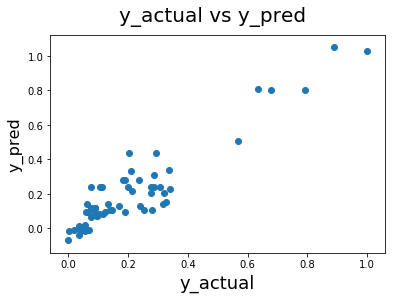

In [80]:
# Plot y_test_carprice and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test_carprice,y_test_pred)
fig.suptitle('y_actual vs y_pred', fontsize=20)               
plt.xlabel('y_actual', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

# Hence the equation for our best fitted line is
#  price = -0.156 + 1.182*enginesize + 0.127*compressionratio + 0.11*peakrpm + 0.129*audi + 0.226*bmw + 0.262*rear + 0.22*rotor
# The significant variables which assist in predicting the price of car in US market are enginesize, compressionratio, peakrpm, Audi, BMW, rear & rotor

# Also the suggestion to Geely Auto is to manufacture Audi & BMW cars in US as they are one of the significant variables in determining the price of cars in US market.